# 이미지 분류 (완전연결층)
---
fashon-MNIST data set

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [75]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [76]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [77]:
y_train[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [78]:
## Label	Description
class_name = ['T-shirt/top','Trouser','Pullover','Dress','Coat',
              'Sandal','Shirt','Sneaker','Bag','Ankle boot']

## 시각화

In [79]:
sample = np.random.randint(60000, size=9)
sample

array([29431, 11388, 28056, 27479, 20126,   720,  8142, 17535, 54716])

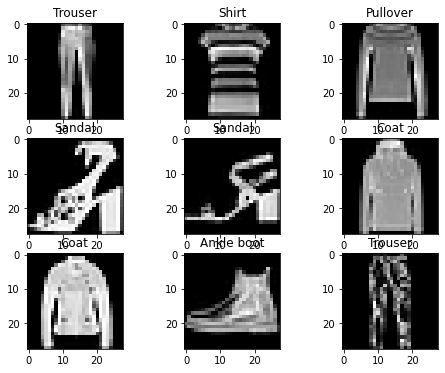

In [80]:
plt.figure(figsize=(8,6))
for i, idx in enumerate(sample):
  plt.subplot(3,3,i+1)
  plt.imshow(X_train[idx], cmap='gray')
  # plt.xticks([])
  # plt.yticks([])
  plt.title(class_name[ y_train[idx]])
# i에는 번호가, idx에는 sample의 값들 (55246, ...)이 저장됨
plt.show()

## 검증용 데이터 (Validation Data)

In [81]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3)

X_train.shape, X_val.shape, X_test.shape

((42000, 28, 28), (18000, 28, 28), (10000, 28, 28))

## 정규화

In [82]:
# MinMax 

X_train = X_train.astype('float32')/255.
X_val = X_val/255.
X_test = X_test/255.

In [83]:
np.min(X_train), np.max(X_train)

(0.0, 1.0)

In [84]:
y_train[:10]

array([1, 9, 6, 6, 9, 4, 4, 2, 8, 1], dtype=uint8)

In [85]:
# one-hot-encoding (다중분류)
from tensorflow.keras.utils import to_categorical

y_train_o = to_categorical(y_train)
y_val_o = to_categorical(y_val)
y_test_o = to_categorical(y_test)
y_train_o[:10]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

## 모델

In [86]:
X_train.shape

(42000, 28, 28)

In [87]:
# 28 * 28을 1차원으로 바꿔야 한다
X_train = X_train.reshape(-1, 28*28)
X_val = X_val.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)
X_train.shape

(42000, 784)

In [93]:
model = keras.Sequential([
    layers.Dense(units=256, activation='relu', input_shape=(784,)),
    layers.Dense(units=64, activation='relu'),
    layers.Dense(units=32, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['acc']
)

In [94]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 256)               200960    
                                                                 
 dense_17 (Dense)            (None, 64)                16448     
                                                                 
 dense_18 (Dense)            (None, 32)                2080      
                                                                 
 dense_19 (Dense)            (None, 10)                330       
                                                                 
Total params: 219,818
Trainable params: 219,818
Non-trainable params: 0
_________________________________________________________________


In [95]:
X_val.shape, y_val_o.shape

((18000, 784), (18000, 10))

In [96]:
EPOCHS = 50
BATCH_SIZE = 32

log = model.fit(X_train, y_train_o,
                epochs = EPOCHS,
                batch_size = BATCH_SIZE,
                validation_data = (X_val, y_val_o),
                verbose = 1)

Epoch 1/50
1313/1313 [==============================] - 7s 5ms/step - loss: 0.5310 - acc: 0.8080 - val_loss: 0.4079 - val_acc: 0.8568
Epoch 2/50
1313/1313 [==============================] - 7s 5ms/step - loss: 0.3852 - acc: 0.8584 - val_loss: 0.3794 - val_acc: 0.8622
Epoch 3/50
1313/1313 [==============================] - 9s 7ms/step - loss: 0.3486 - acc: 0.8713 - val_loss: 0.3494 - val_acc: 0.8716
Epoch 4/50
1313/1313 [==============================] - 8s 6ms/step - loss: 0.3228 - acc: 0.8820 - val_loss: 0.3375 - val_acc: 0.8776
Epoch 5/50
1313/1313 [==============================] - 6s 5ms/step - loss: 0.3039 - acc: 0.8869 - val_loss: 0.3377 - val_acc: 0.8772
Epoch 6/50
1313/1313 [==============================] - 7s 5ms/step - loss: 0.2870 - acc: 0.8926 - val_loss: 0.3404 - val_acc: 0.8764
Epoch 7/50
1313/1313 [==============================] - 9s 7ms/step - loss: 0.2749 - acc: 0.8981 - val_loss: 0.3158 - val_acc: 0.8846
Epoch 8/50
1313/1313 [==============================] - 11s 8m

In [97]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16,8))
    plt.subplot(1,2,1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'],label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'],label = 'Val Loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['acc'],label='Train Accuracy')
    plt.plot(hist['epoch'], hist['val_acc'],label = 'Val Accuracy')

    plt.legend()
    plt.show()

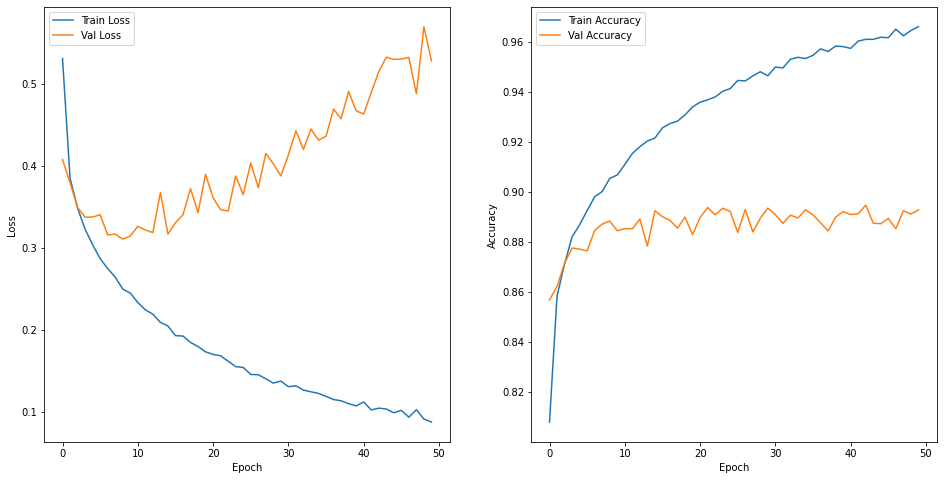

In [98]:
plot_history(log)

## 평가

In [99]:
model.evaluate(X_train, y_train_o)

1313/1313 [==============================] - 3s 2ms/step - loss: 0.0713 - acc: 0.9735


[0.07130973041057587, 0.9735237956047058]

In [100]:
model.evaluate(X_test, y_test_o)

313/313 [==============================] - 1s 3ms/step - loss: 0.6131 - acc: 0.8898


[0.6130625009536743, 0.8898000121116638]

In [101]:
# 예측
y_pred = model.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 3ms/step


array([[9.1157915e-11, 1.2581803e-07, 7.9182452e-11, 3.1363430e-09,
        1.7096626e-08, 5.1604306e-06, 6.5392908e-10, 1.3789835e-03,
        2.6621045e-09, 9.9861568e-01],
       [1.3923042e-09, 2.4382877e-26, 9.9999768e-01, 2.6341765e-18,
        8.8606065e-08, 2.5300779e-24, 2.1668011e-06, 1.8080970e-23,
        2.6663795e-16, 1.1852794e-34],
       [1.2333503e-33, 9.9999994e-01, 2.3191146e-32, 4.3005020e-24,
        4.8356785e-33, 0.0000000e+00, 1.1819962e-32, 0.0000000e+00,
        8.9869887e-30, 1.6631801e-38],
       [3.8730568e-26, 9.9999994e-01, 1.0245914e-26, 2.7816662e-19,
        1.0074991e-26, 0.0000000e+00, 6.9293557e-25, 1.8272035e-38,
        1.0364961e-24, 6.7282152e-32],
       [3.0963922e-01, 0.0000000e+00, 5.8022276e-10, 9.1537767e-18,
        6.5323573e-11, 3.6187407e-20, 6.9036072e-01, 2.7716381e-24,
        6.8322821e-12, 2.4985159e-26]], dtype=float32)

In [102]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

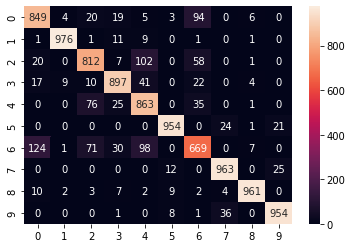

In [105]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

confusion = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion, annot=True, fmt='1')

### 오답 이미지 시각화

In [119]:
wrong = np.where((y_test == y_pred) == False)[0]
samples = np.random.choice(wrong, 9)
samples

array([2435, 5760, 4650, 7024, 6437, 4711, 8237, 5939, 1129])

In [122]:
X_test = X_test.reshape(-1,28,28)

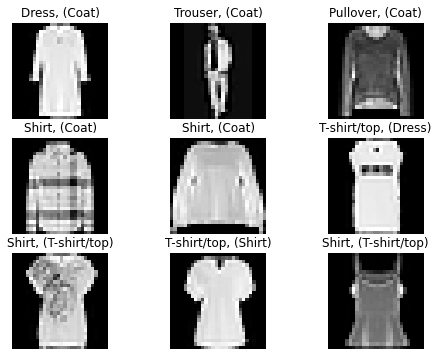

In [125]:
plt.figure(figsize=(8,6))
for i, idx in enumerate(samples):
  plt.subplot(3,3,i+1)
  plt.imshow(X_test[idx], cmap='gray')
  plt.axis('off')
  plt.title(f'{class_name[ y_test[idx]]}, ({class_name[ y_pred[idx]]})')
# i에는 번호가, idx에는 sample의 값들 (55246, ...)이 저장됨
plt.show()